# Houston Career Center Access by Household Income

## Project Initiative

The organization director has requested we assess the common incomes within 2 miles of our career center offices. 

## Analysis Approach

For this preliminary analysis, we aim to provide a list of common incomes around each career center in the Houston Metro Area. All data has already been projected into the NAD 1983 2011 State Plane Texas South Central FIPS 4204 (US Feet), the appropriate coordinate system for Harris County, Texas. 

### Access Project Files

First, we import the 2010 Median Household Income and Workforce Solutions Career Offices layers from the Houston Career Center and Household Income maps into the script. 

In [1]:
median_income = "2010 Median Household Income by Census Block"
career_centers = "Workforce Solutions Career Offices"
print("layers imported")

layers imported


### Create 2 mile buffers

Second, we create a buffer for 2 miles around each workforce center.

In [2]:
career_buffer = "CareerCenter_2MileBuffer"
arcpy.analysis.Buffer(career_centers, career_buffer, "2 Miles")
print("buffer created")

buffer created


### Summarize incomes within 2 miles of a workforce center

Third, we use the summarize within tool to return the Minimum, Maximum, and Mean household incomes within 2 miles of each workforce center. 

In [3]:
blocks_stats = "Blocks2Miles_Stats"
keep_all = "ONLY_INTERSECTING"
sum_fields = [["Median_HHI", "MIN"], ["Median_HHI", "Max"], ["Median_HHI", "Mean"]]
shape_sum = "NO_SHAPE_SUM"
shape_unit = "SQUAREMILES"
group_filed = None
min_maj = "NO_MIN_MAJ"
add_percent = "NO_PERCENT"
out_table = None
arcpy.analysis.SummarizeWithin(
    in_polygons=career_buffer,
    in_sum_features=median_income,
    out_feature_class=blocks_stats,
    keep_all_polygons=keep_all,
    sum_fields=sum_fields,
    sum_shape=shape_sum,
    shape_unit=shape_unit,
    group_field=group_filed,
    add_min_maj=min_maj,
    add_group_percent=add_percent,
    out_group_table=out_table
)
print("summary created")

summary created


### Return the statistics for each workforce center

Finally, we will print out the statistics for each workforce center in the notebook for ease of review. 

In [4]:
field_list = ["Center_Nam", "min_Median_HHI", "max_Median_HHI", "mean_Median_HHI"]
with arcpy.da.SearchCursor(blocks_stats, field_list) as cursor:
    for row in cursor:
        center_name = row[0]
        min_hhi = round(row[1], 2)
        max_hhi = round(row[2], 2)
        mean_hhi = round(row[3], 2)
        print(f"Center Name: {center_name} | Minimum Median Household Income: {min_hhi} | Maximum Median Household Income: {max_hhi} | Mean Median Household Income: {mean_hhi}")
del cursor

Center Name: ASTRODOME | Minimum Median Household Income: 253.41 | Maximum Median Household Income: 210511.0 | Mean Median Household Income: 61335.67
Center Name: DOWNTOWN | Minimum Median Household Income: 1.19 | Maximum Median Household Income: 102824.0 | Mean Median Household Income: 46337.42
Center Name: EAST END | Minimum Median Household Income: 0.0 | Maximum Median Household Income: 75407.26 | Mean Median Household Income: 29046.57
Center Name: CYPRESS STATION | Minimum Median Household Income: 244.06 | Maximum Median Household Income: 68269.0 | Mean Median Household Income: 39837.36
Center Name: HOBBY | Minimum Median Household Income: 30.89 | Maximum Median Household Income: 72785.12 | Mean Median Household Income: 30863.17
Center Name: NORTHLINE | Minimum Median Household Income: 78.1 | Maximum Median Household Income: 58077.16 | Mean Median Household Income: 26890.12
Center Name: NORTHSHORE | Minimum Median Household Income: 3980.31 | Maximum Median Household Income: 61027.0

### Create a graph of household incomes

To better understand the data, we will create a box plot showing the minimum, maximum, and mean household incomes for each workforce center. 

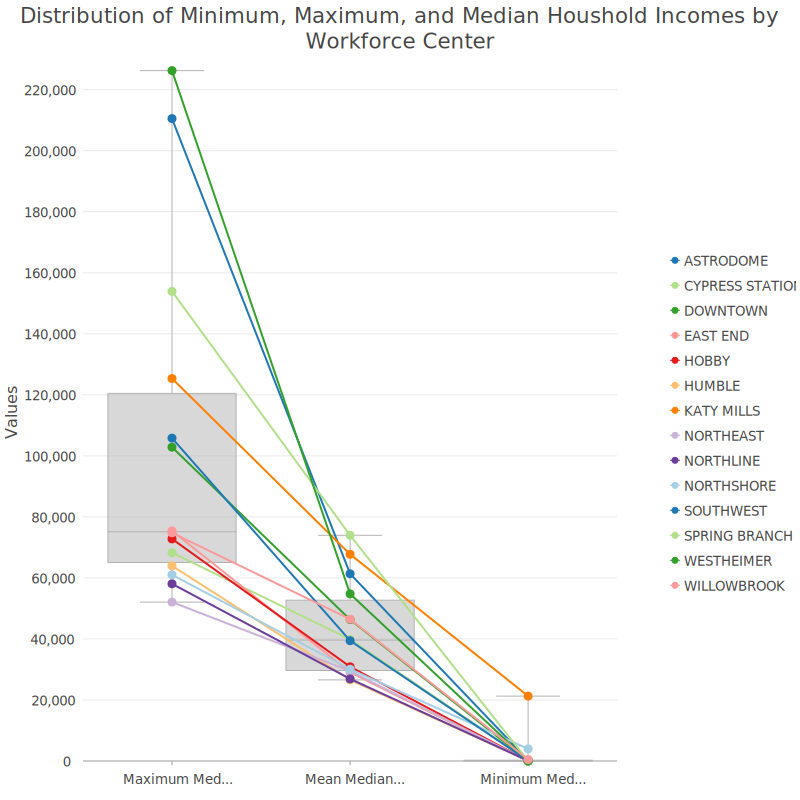

In [5]:
chart = arcpy.charts.Box(y=["min_Median_HHI", "max_Median_HHI", "mean_Median_HHI"], dataSource=blocks_stats,
                         splitCategory="Center_Nam",
                         splitCategoryAsMeanLine=True,
                         displaySize = [800, 800],
                         title = "Distribution of Minimum, Maximum, and Median Houshold Incomes by Workforce Center")
chart